# Group Members:Brando,Danny, Aleema, Logan
We've identified loan defaults as a significant issue leading to financial losses for banks, financial institutions, and governments, based on data insights from Coursera's data science coding challenge. Our solution aims to address this challenge by implementing predictive models and risk mitigation strategies in the loan approval process, utilizing the insights gained from this valuable data. The existing debt collection industry, is only successful in recovering a 20-30% of the owed debt. This issued has created billions of dollars worth of defaulted loans at stake for these institutions. The social implications for debtors are also noteworthy, as defaulted loans can negatively impact individuals' credit scores and financial well-being.

The proposed solution involves leveraging predictive analytics and machine learning techniques we've learned in class to develop a model capable of identifying individuals likely to default on loans. By implementing such a model, lending institutions can make more informed decisions about loan approvals, thereby reducing the overall rate of defaults. This has direct financial benefits for the institutions, as they can minimize losses associated with defaulted loans and potentially increase their overall loan portfolio performance. Additionally, the solution has broader social implications, as it promotes responsible lending practices, helps protect individuals from potential financial distress, and contributes to the overall stability of the financial system.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
loan=pd.read_csv('Loan_default.csv')

In [ ]:
loan=loan.sample(frac=0.05, random_state=42)

In [ ]:
loan.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
51139,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,PhD,Self-employed,Single,Yes,Yes,Home,No,0
71005,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,High School,Part-time,Divorced,Yes,Yes,Education,Yes,0
35684,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,Master's,Part-time,Married,Yes,Yes,Education,Yes,0
174087,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,High School,Part-time,Single,No,No,Business,Yes,0
137952,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,PhD,Unemployed,Single,No,Yes,Business,Yes,0


In [ ]:
loan.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [ ]:
loan=loan.drop('LoanID', axis=1)

<Axes: >

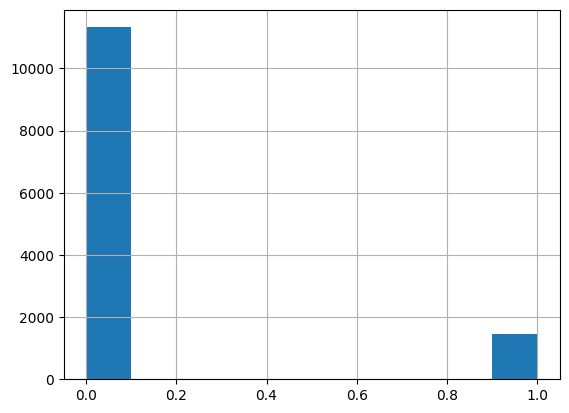

In [ ]:
loan['Default'].hist()

In [ ]:
loan=pd.get_dummies(loan)

In [ ]:
X=loan.drop('Default', axis=1)
y=loan['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression

In [ ]:
logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred_log = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test,y_pred_log)

array([[3378,    9],
       [ 429,   15]])

In [ ]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3387
           1       0.62      0.03      0.06       444

    accuracy                           0.89      3831
   macro avg       0.76      0.52      0.50      3831
weighted avg       0.86      0.89      0.84      3831



In [ ]:
from sklearn.metrics import roc_auc_score
print("ROC AUC:", roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1]))

ROC AUC: 0.7621436760055006


In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a logistic regression model
logreg_model = LogisticRegression()

# Define hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,100,1000]}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(logreg_model, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on the test set and calculate ROC AUC
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC on Test Set:", roc_auc)
print(classification_report(y_test,y_pred_log))

Best Hyperparameters: {'C': 1000}
ROC AUC on Test Set: 0.7621888939426584
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3387
           1       0.62      0.03      0.06       444

    accuracy                           0.89      3831
   macro avg       0.76      0.52      0.50      3831
weighted avg       0.86      0.89      0.84      3831



KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
Y_pred_knn = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, Y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test,knn.predict_proba(X_test)[:, 1] ))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3387
           1       0.19      0.03      0.05       444

    accuracy                           0.87      3831
   macro avg       0.54      0.51      0.49      3831
weighted avg       0.80      0.87      0.83      3831

ROC AUC: 0.5496931829969917


XGBoost Classification model

In [ ]:
xg_class = xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=10)

In [ ]:
xg_class.fit(X_train,y_train)

y_pred_xg = xg_class.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_xg)
print(conf_matrix)

[[3387    0]
 [ 444    0]]


In [ ]:
print(classification_report(y_test, y_pred_xg))
print("ROC AUC:", roc_auc_score(y_test, xg_class.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      3387
           1       0.00      0.00      0.00       444

    accuracy                           0.88      3831
   macro avg       0.44      0.50      0.47      3831
weighted avg       0.78      0.88      0.83      3831

ROC AUC: 0.726744015937993


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    'max_depth': [3, 5, 6, 10, 15, 20],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.4, 1.0, 0.1),
    'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
    'n_estimators': [100, 500, 1000]
}

# Create XGBoost classifier for binary classification
xgb_clf = xgb.XGBClassifier(seed=20)

# Randomized search for hyperparameter optimization
clf = RandomizedSearchCV(estimator=xgb_clf,
                         param_distributions=params,
                         scoring='roc_auc',
                         n_iter=25,
                         verbose=1)

# Fit the randomized search to find the best hyperparameters
clf.fit(X_train, y_train)

# Print the best parameters and highest ROC AUC
print("Best parameters:", clf.best_params_)
print("Highest ROC AUC: ", clf.best_score_)

# Use the best parameters to train the final model
best_params = clf.best_params_
final_model = xgb.XGBClassifier(seed=20, **best_params)
final_model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = final_model.predict_proba(X_test)[:, 1]

# Evaluate ROC AUC on the test set
roc_auc_test = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC on Test Set: ", roc_auc_test)
print(classification_report(y_test,y_pred_log))


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.5}
Highest ROC AUC:  0.7348907691093637
ROC AUC on Test Set:  0.7609021776426559
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3387
           1       0.62      0.03      0.06       444

    accuracy                           0.89      3831
   macro avg       0.76      0.52      0.50      3831
weighted avg       0.86      0.89      0.84      3831



Boosted Tree

In [ ]:
bt_model = AdaBoostClassifier(n_estimators=20)
bt_model.fit(X_train,y_train)
y_pred_bt = bt_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_bt))
print("ROC AUC:", roc_auc_score(y_test, bt_model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      3387
           1       0.57      0.07      0.12       444

    accuracy                           0.89      3831
   macro avg       0.73      0.53      0.53      3831
weighted avg       0.85      0.89      0.84      3831

ROC AUC: 0.7446406769923156


Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)

In [ ]:
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix)

[[3386    1]
 [ 435    9]]


In [ ]:
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3387
           1       0.90      0.02      0.04       444

    accuracy                           0.89      3831
   macro avg       0.89      0.51      0.49      3831
weighted avg       0.89      0.89      0.84      3831

ROC AUC: 0.7251005434132093


MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(20), max_iter=1000, random_state=1)

In [ ]:
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_mlp)
print(conf_matrix)

[[3361   26]
 [ 405   39]]


In [ ]:
print(classification_report(y_test, y_pred_mlp))
print("ROC AUC:", roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      3387
           1       0.60      0.09      0.15       444

    accuracy                           0.89      3831
   macro avg       0.75      0.54      0.55      3831
weighted avg       0.86      0.89      0.85      3831

ROC AUC: 0.720231968017619


TensorFlow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

In [ ]:
tf_model = Sequential()
tf_model.add(Dense(units=64,activation='relu'))
tf_model.add(Dense(units=32,activation='relu'))
tf_model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
tf_model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
tf_model.fit(x=X_train,
          y=y_train,
          batch_size=128,
          epochs=100,
          validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
70/70 [==============================] - 1s 4ms/step - loss: 0.3670 - val_loss: 0.3466
Epoch 2/100
70/70 [==============================] - 0s 2ms/step - loss: 0.3342 - val_loss: 0.3340
Epoch 3/100
70/70 [==============================] - 0s 3ms/step - loss: 0.3221 - val_loss: 0.3214
Epoch 4/100
70/70 [==============================] - 0s 3ms/step - loss: 0.3134 - val_loss: 0.3133
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 0.3101 - val_loss: 0.3119
Epoch 6/100
70/70 [==============================] - 0s 2ms/step - loss: 0.3095 - val_loss: 0.3119
Epoch 7/100
70/70 [==============================] - 0s 2ms/step - loss: 0.3077 - val_loss: 0.3114
Epoch 8/100
70/70 [==============================] - 0s 2ms/step - loss: 0.3068 - val_loss: 0.3130
Epoch 9/100
70/70 [==============================] - 0s 3ms/step - loss: 0.3048 - val_loss: 0.3113
Epoch 10/100
70/70 [==============================] - 0s 3ms/step - loss: 0.3040 - val_loss: 0.3129
Epoch 11/

In [ ]:
y_pred_tf = tf_model.predict(X_test)

120/120 [==============================] - 0s 909us/step


In [ ]:
y_pred_bin = y_pred_tf>.5

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_mlp)
print(conf_matrix)

[[3361   26]
 [ 405   39]]


In [ ]:
print(classification_report(y_test, y_pred_bin))
print("ROC AUC:", roc_auc_score(y_test, y_pred_bin))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3387
           1       0.31      0.18      0.22       444

    accuracy                           0.86      3831
   macro avg       0.60      0.56      0.57      3831
weighted avg       0.83      0.86      0.84      3831

ROC AUC: 0.562151389653604


Feature Importance

In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=1e99f193a8635a99187bdc5c6f715122f58cc111b25f129dcc2ccfcbcff28cb1
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5

from eli5.sklearn import PermutationImportance

perm = PermutationImportance(logmodel).fit(X_test, y_test)
eli5.show_weights(perm,  feature_names = X.columns.tolist())

Weight,Feature
0.0014 ± 0.0006,EmploymentType_Full-time
0.0011 ± 0.0016,LoanAmount
0.0010 ± 0.0012,InterestRate
0.0010 ± 0.0012,Age
0.0010 ± 0.0010,DTIRatio
0.0009 ± 0.0016,MonthsEmployed
0.0007 ± 0.0014,HasDependents_Yes
0.0005 ± 0.0003,LoanPurpose_Business
0.0004 ± 0.0004,MaritalStatus_Single
0.0004 ± 0.0005,LoanPurpose_Home


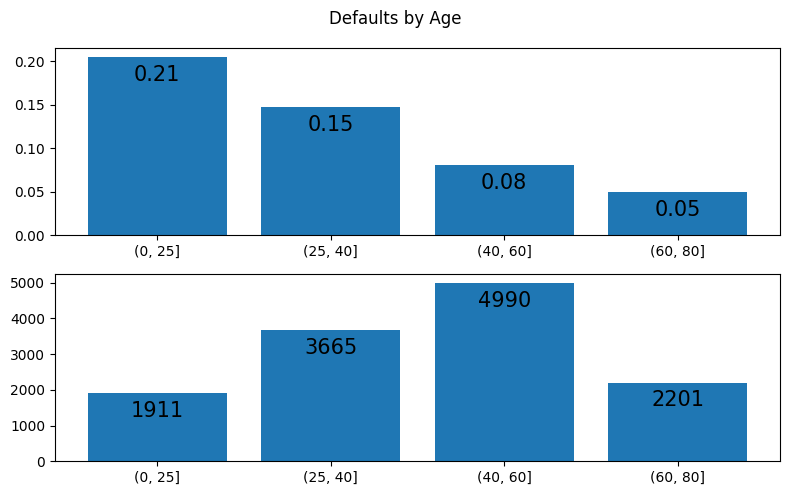

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


age_bins = [0, 25, 40, 60, 80]

age_summary = loan.groupby(pd.cut(loan['Age'], bins=age_bins))['Default'].agg(['mean', 'size'])

age_summary.reset_index(inplace=True)

fig2, axs2 = plt.subplots(2, figsize=(8, 5))

fig2.suptitle('Defaults by Age')

bars1 = axs2[0].bar(age_summary.Age.astype('str'), age_summary['mean'])

bars2 = axs2[1].bar(age_summary.Age.astype('str'), age_summary['size'])

def add_bar_labels(ax, bars, decimal_points=True):
    for bar in bars:
        height = bar.get_height()
        format_str = '{:.2f}' if decimal_points else '{:.0f}'
        ax.annotate(format_str.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, -20),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=15)


add_bar_labels(axs2[0], bars1)


add_bar_labels(axs2[1], bars2, decimal_points=False)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

employmenttype = loan.groupby('EmploymentType', as_index=False)['Default'].mean()

employmenttype = employmenttype.merge(
    loan.groupby('EmploymentType', as_index=False)['Default'].count(),
    left_on='EmploymentType', right_on='EmploymentType', suffixes=("_rate", "_count")
)

fig, axs = plt.subplots(2, figsize=(8, 5))

fig.suptitle('Default by Employment Type')


bars1 = axs[0].bar(employmenttype.EmploymentType, employmenttype.Default_rate)

bars2 = axs[1].bar(employmenttype.EmploymentType, employmenttype.Default_count)

def add_bar_labels(ax, bars, decimal_points=True):
    for bar in bars:
        height = bar.get_height()
        format_str = '{:.2f}' if decimal_points else '{:.0f}'
        ax.annotate(format_str.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, -20),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=15)

add_bar_labels(axs[0], bars1)

add_bar_labels(axs[1], bars2, decimal_points=False)

plt.tight_layout()
plt.show()


KeyError: ignored

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


income_bins = [0, 40000, 75000, 100000, 125000, 150000]

income_summary = loan.groupby(pd.cut(loan['Income'], bins=income_bins))['Default'].agg(['mean', 'size'])

income_summary.reset_index(inplace=True)

fig2, axs2 = plt.subplots(2, figsize=(8,5))

fig2.suptitle('Defaults by Income')


bars1 = axs2[0].bar(income_summary.Income.astype('str'), income_summary['mean'])

bars2 = axs2[1].bar(income_summary.Income.astype('str'), income_summary['size'])

def add_bar_labels(ax, bars, decimal_points=True):
    for bar in bars:
        height = bar.get_height()
        format_str = '{:.2f}' if decimal_points else '{:.0f}'
        ax.annotate(format_str.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0,-18),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=15)

add_bar_labels(axs2[0], bars1)

add_bar_labels(axs2[1], bars2, decimal_points=False)


plt.tight_layout()
plt.show()


False Positives: Incorrectly predicting that an applicant will default on a loan when they would not have, can lead to a loss of potential revenue for the institution. It also harms customer relationships and can lead to reputational damage if seen as overly cautious or unjust.


False Negatives: Failing to predict a default can have serious financial consequences, as it results in the loss of both principal and interest. Additionally, a high number of false negatives can signal to regulatory bodies that the institution's risk management practices are inadequate.
